In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

In [27]:
df_bank = pd.read_csv('../data/output/bank-additional_01.csv', index_col=False)
pd.set_option('display.max_columns', None)
df_bank.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,ID
0,0,NaN,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,married,high.school,NaN,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [3]:
df = df_bank.copy()

In [4]:
df.isnull().mean()*100

Unnamed: 0         0.000000
age               11.906977
job                0.802326
marital            0.197674
education          4.202326
default           20.886047
housing            2.386047
loan               2.386047
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     1.095349
cons.conf.idx      0.000000
euribor3m         21.525581
nr.employed        0.000000
y                  0.000000
date               0.576744
latitude           0.000000
longitude          0.000000
ID                 0.000000
dtype: float64

In [5]:
def comas (df):
    for col in df.select_dtypes(include="O"):

        df[col] = df[col].str.replace(",", ".")
        try:
            df[col] = df[col].astype("float64")
        except:
            pass
comas (df)

In [6]:
df_nulos = df.loc[ : , df.isnull().sum()>0]
df_nulos

,age,job,marital,education,default,housing,loan,cons.price.idx,euribor3m,date
0,NaN,housemaid,married,basic.4y,0.0,0.0,0.0,93.994,4.857,2-agosto-2019
1,57.0,services,married,high.school,NaN,0.0,0.0,93.994,NaN,14-septiembre-2016
2,37.0,services,married,high.school,0.0,1.0,0.0,93.994,4.857,15-febrero-2019
3,40.0,admin.,married,basic.6y,0.0,0.0,0.0,93.994,NaN,29-noviembre-2015
4,56.0,services,married,high.school,0.0,0.0,1.0,93.994,NaN,29-enero-2017
...,...,...,...,...,...,...,...,...,...,...
42995,NaN,admin.,married,university.degree,0.0,0.0,0.0,93.444,NaN,13-octubre-2015
42996,34.0,technician,married,professional.course,0.0,1.0,1.0,93.200,NaN,17-marzo-2018
42997,NaN,blue-collar,single,basic.6y,0.0,1.0,0.0,93.918,NaN,15-septiembre-2016
42998,NaN,admin.,married,university.degree,NaN,0.0,0.0,93.918,4.958,23-septiembre-2019


In [7]:
df["default"].value_counts()

default
0.0    34016
1.0        3
Name: count, dtype: int64

In [8]:
for col in df_nulos.select_dtypes(include="number").columns:
    print(col.upper())
    display(df[col].value_counts()/df.shape[0]*100)
    print("_______________")

AGE


age
31.0    4.209302
33.0    3.962791
32.0    3.888372
36.0    3.834884
34.0    3.739535
          ...   
91.0    0.004651
98.0    0.004651
95.0    0.002326
87.0    0.002326
94.0    0.002326
Name: count, Length: 78, dtype: float64

_______________
DEFAULT


default
0.0    79.106977
1.0     0.006977
Name: count, dtype: float64

_______________
HOUSING


housing
1.0    52.320930
0.0    45.293023
Name: count, dtype: float64

_______________
LOAN


loan
0.0    82.423256
1.0    15.190698
Name: count, dtype: float64

_______________
CONS.PRICE.IDX


cons.price.idx
93.994    18.460465
93.918    16.132558
92.893    13.918605
93.444    12.439535
94.465    10.516279
93.200     8.676744
93.075     5.934884
92.201     1.867442
92.963     1.725581
92.431     1.095349
92.649     0.872093
94.215     0.744186
94.199     0.734884
92.843     0.693023
92.379     0.637209
93.369     0.630233
94.027     0.562791
94.055     0.548837
93.876     0.520930
94.601     0.493023
92.469     0.427907
92.713     0.416279
93.749     0.416279
94.767     0.302326
93.798     0.111628
92.756     0.025581
Name: count, dtype: float64

_______________
EURIBOR3M


euribor3m
4.857    5.318605
4.962    4.939535
4.963    4.695349
4.961    3.706977
4.964    2.241860
           ...   
5.045    0.002326
4.921    0.002326
0.895    0.002326
0.956    0.002326
0.953    0.002326
Name: count, Length: 309, dtype: float64

_______________


In [11]:
df_nulos.select_dtypes(include="object").isnull().mean()*100

job          0.802326
marital      0.197674
education    4.202326
date         0.576744
dtype: float64

In [12]:
#comprobar si los nulos tienen alguna explicacion

df_default_yes = df[df["default"] == 1]
df_default_yes.isnull().mean()*100

Unnamed: 0         0.000000
age               33.333333
job                0.000000
marital            0.000000
education          0.000000
default            0.000000
housing            0.000000
loan               0.000000
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
date               0.000000
latitude           0.000000
longitude          0.000000
ID                 0.000000
dtype: float64

cuando "default" es = 1, es decir, tiene historial de incumplimiento, el resto de columnas no tiene nulos, por lo que puede ser que si el cliente no tiene incumplimiento hay algunas casillas que no tienen valores asociados.

In [13]:
df_default_no = df[df["default"] == 0]
df_default_no.isnull().mean()*100

Unnamed: 0         0.000000
age               11.800329
job                0.552681
marital            0.214605
education          3.639464
default            0.000000
housing            2.331256
loan               2.331256
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     1.114182
cons.conf.idx      0.000000
euribor3m         21.460489
nr.employed        0.000000
y                  0.000000
date               0.605597
latitude           0.000000
longitude          0.000000
ID                 0.000000
dtype: float64

In [14]:
df_previous_no = df[df["previous"] == 0]
df_previous_no.isnull().mean()*100

Unnamed: 0         0.000000
age               11.875051
job                0.822036
marital            0.177883
education          4.110180
default           22.601946
housing            2.363690
loan               2.363690
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     1.094251
cons.conf.idx      0.000000
euribor3m         21.585856
nr.employed        0.000000
y                  0.000000
date               0.592944
latitude           0.000000
longitude          0.000000
ID                 0.000000
dtype: float64

In [15]:
df_pdays_no = df[df["pdays"] == 999]
df_pdays_no.isnull().mean()*100

Unnamed: 0         0.000000
age               11.899932
job                0.782382
marital            0.193181
education          4.119579
default           21.529991
housing            2.388197
loan               2.388197
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     1.089056
cons.conf.idx      0.000000
euribor3m         21.604849
nr.employed        0.000000
y                  0.000000
date               0.572298
latitude           0.000000
longitude          0.000000
ID                 0.000000
dtype: float64

Parece que no hay explicacion sobre los nulos

In [16]:
def subplot_col_num (dataframe):
    col_nums = dataframe.select_dtypes(include="number").columns
    num_graph = len(col_nums)
    num_rows = (num_graph + 2)// 2

    fig, axes = plt.subplots(num_graph, 2, figsize=(15, num_rows*5))

    for i, col in enumerate(col_nums):
        sns.histplot(data=dataframe, x=col, ax=axes[i,0], bins=200)
        axes[i,0].set_title(f"Distribución de {col}")
        axes[i,0].set_xlabel(col)
        axes[i,0].set_ylabel("Frecuencia")

        sns.boxplot(data=dataframe, x=col, ax =axes[i,1])
        axes[i,1].set_title(f"Boxplot de {col}")

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

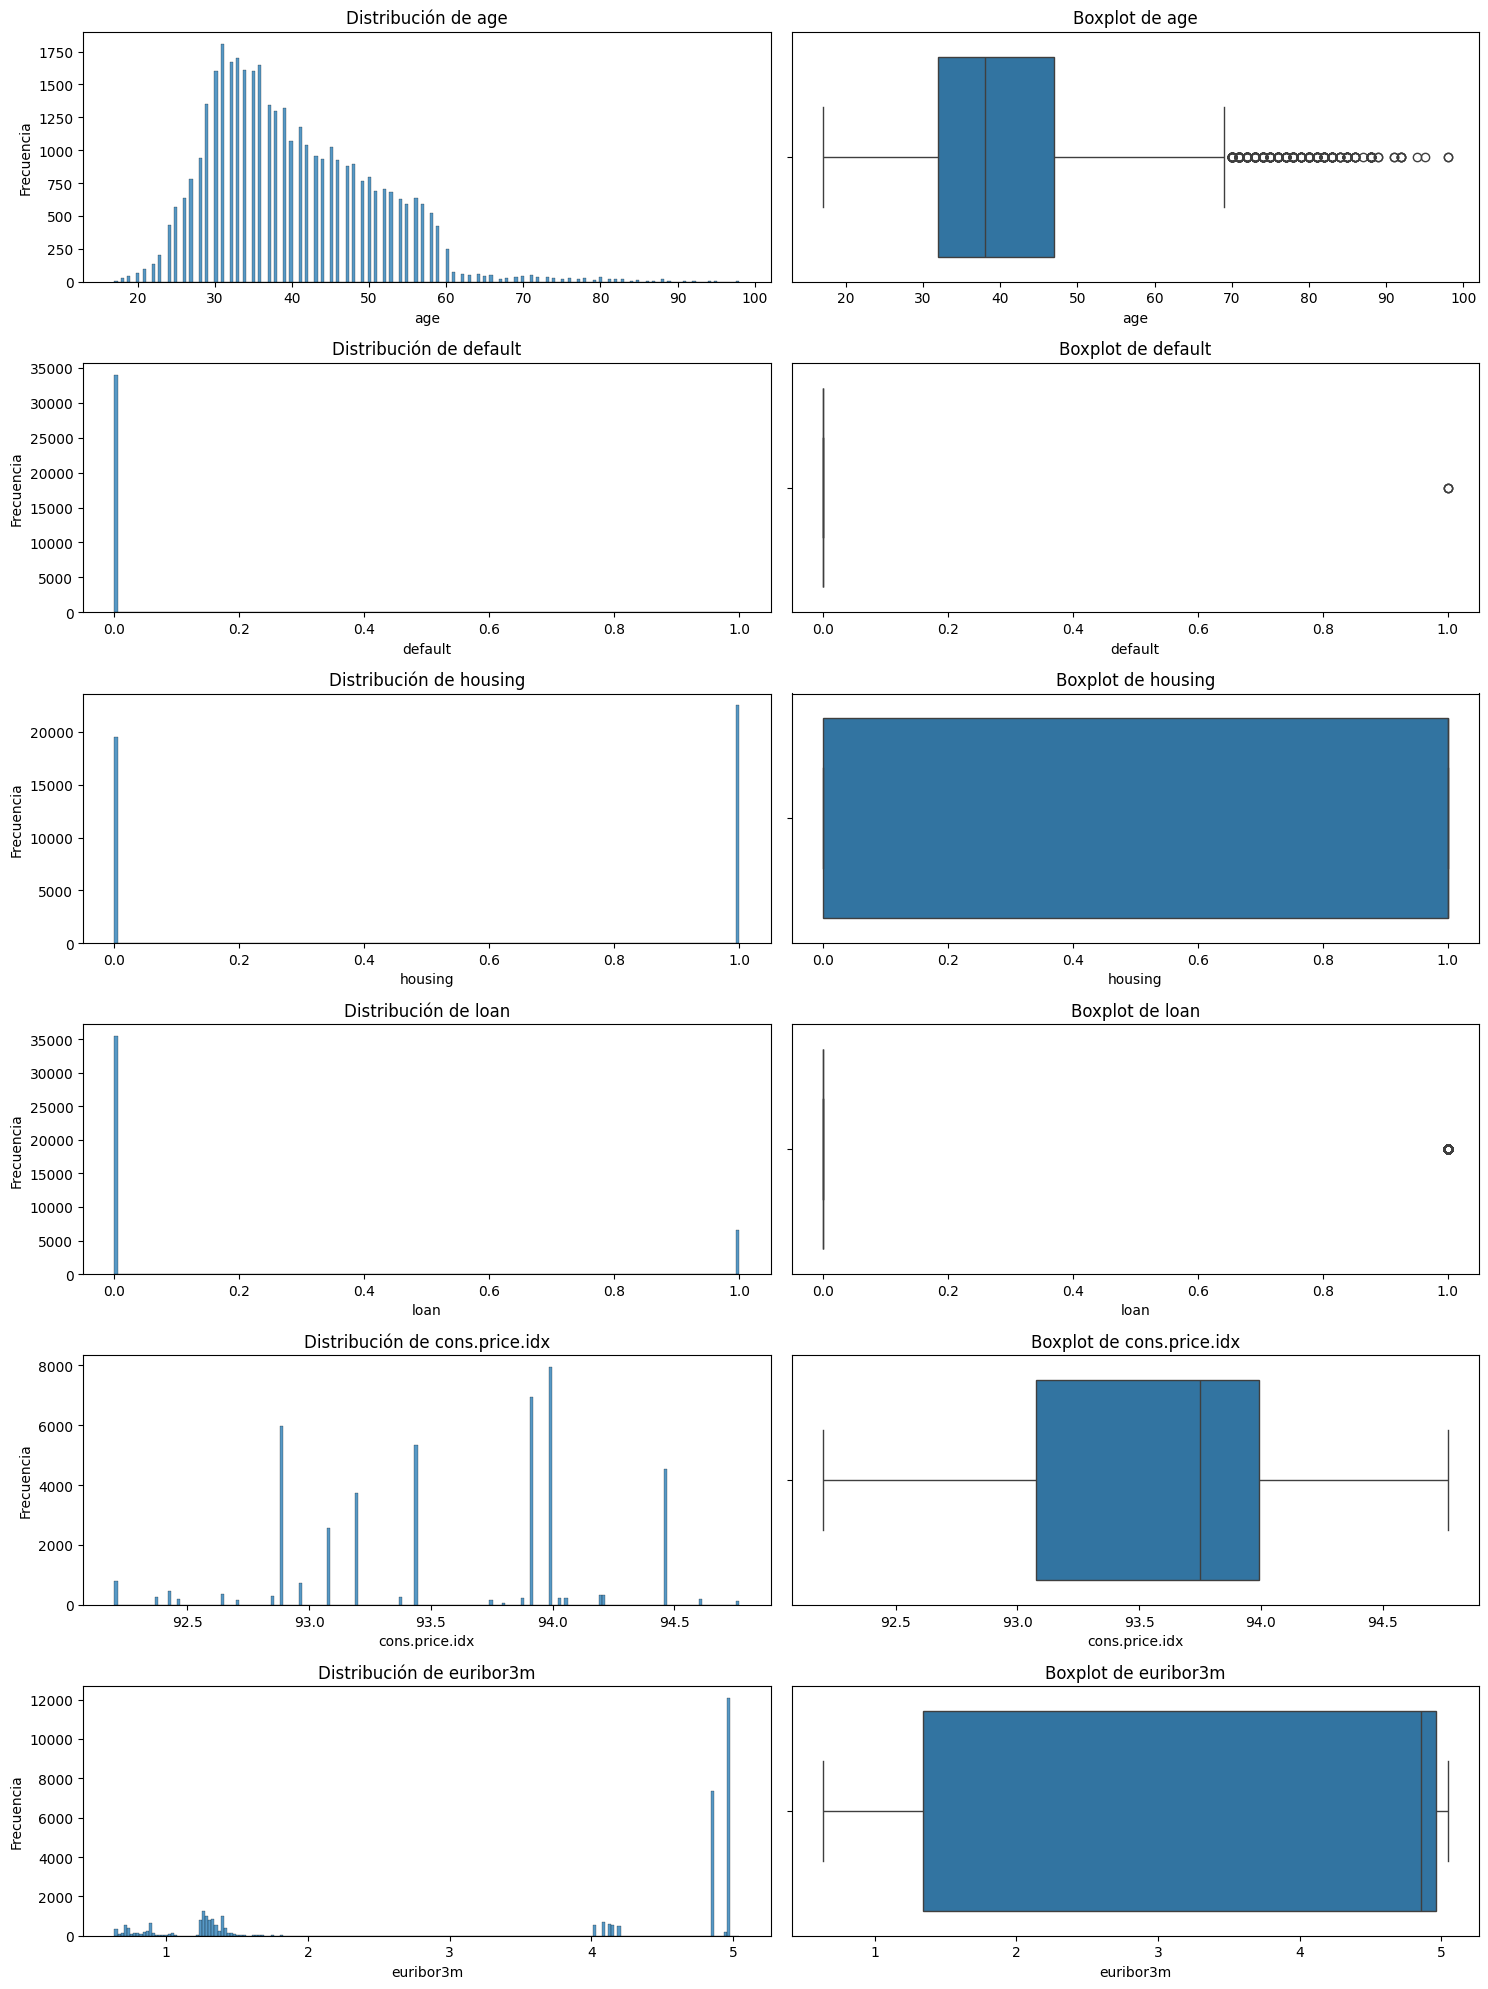

In [17]:
subplot_col_num (df_nulos)

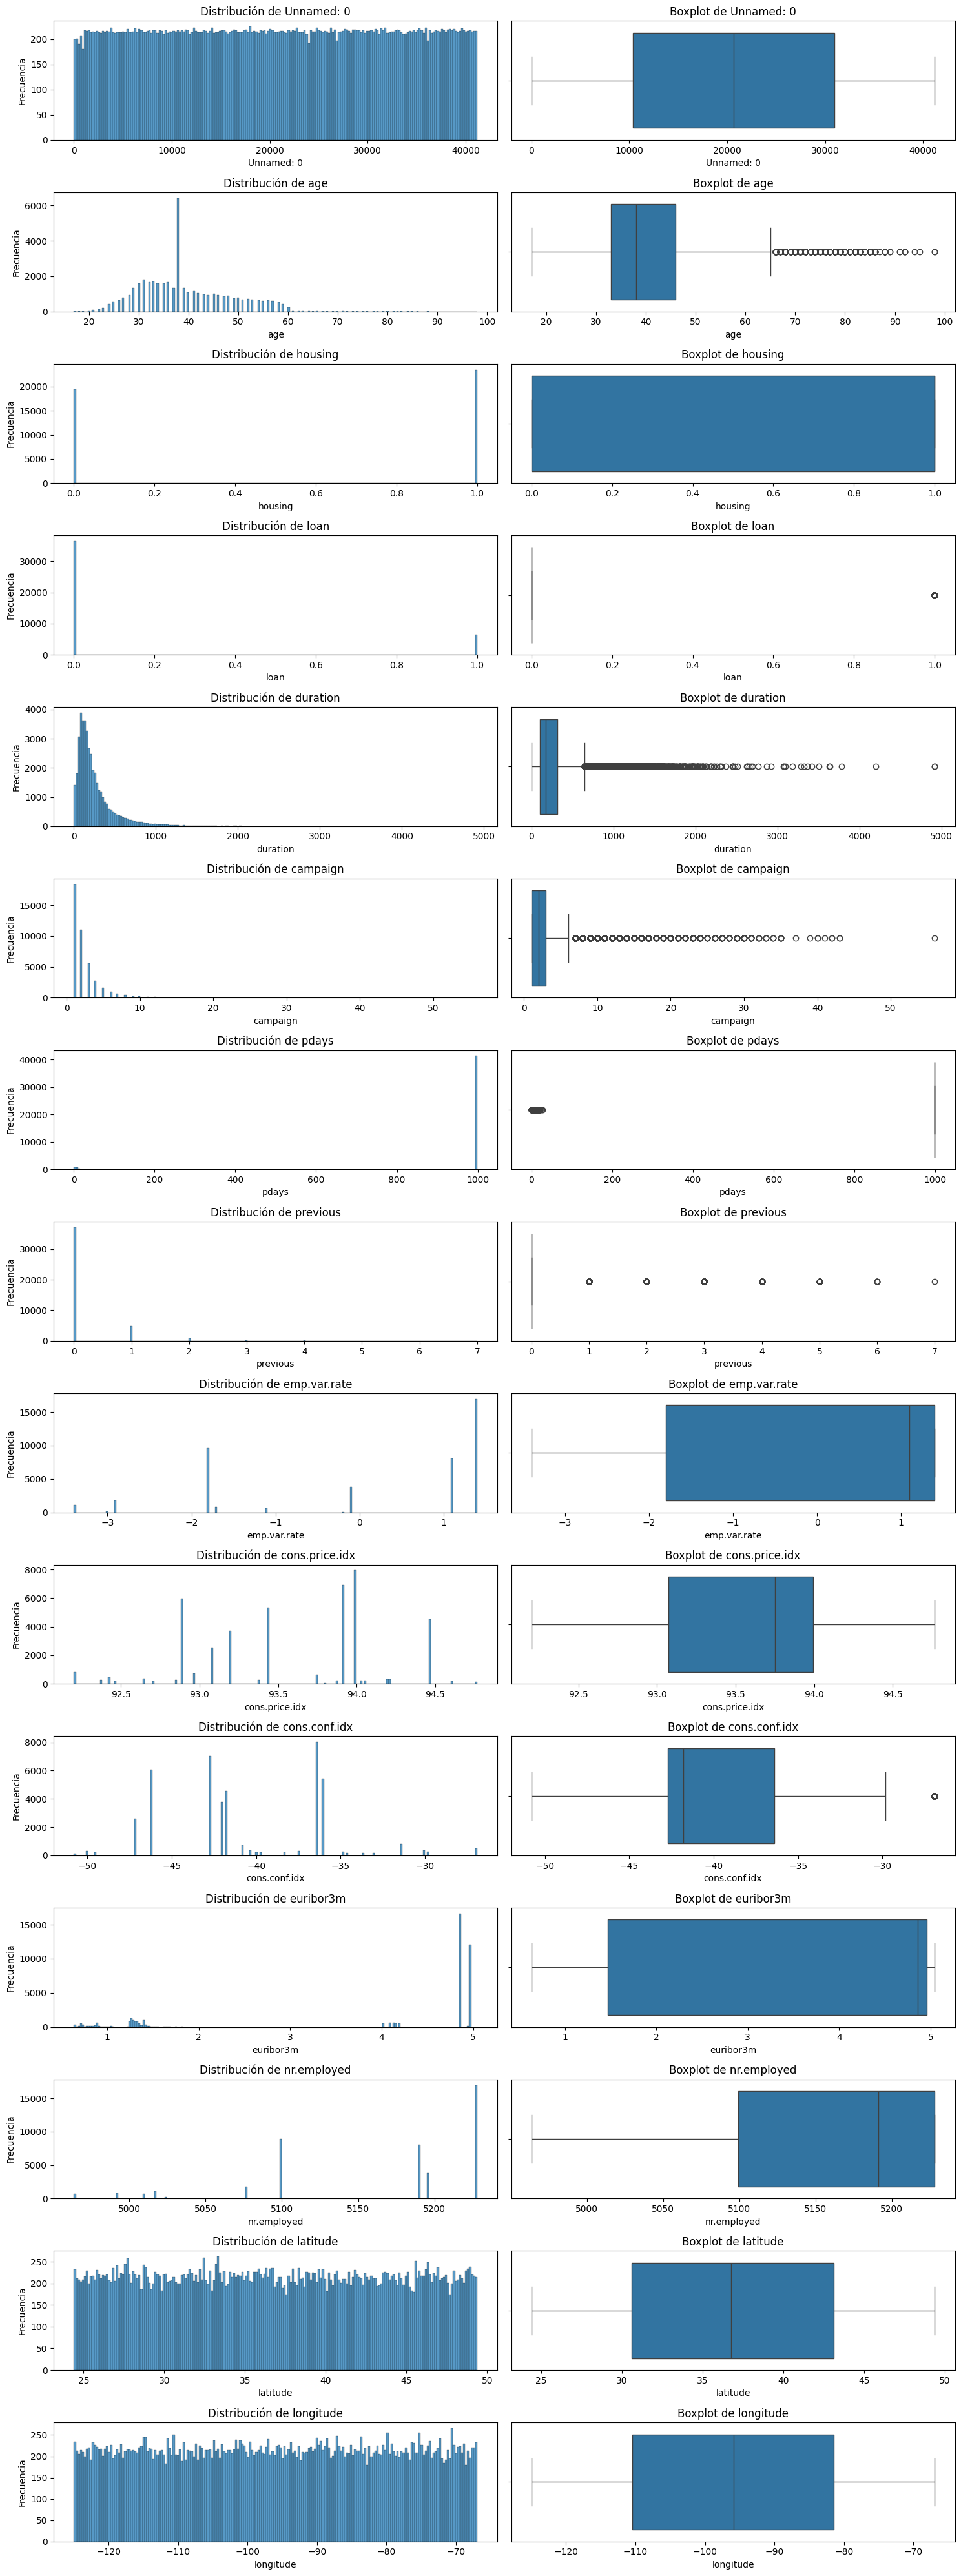

In [68]:
subplot_col_num (df)

- Para la distribucion "age" vemos que hay outliers entre 70-100 pero la mayor cantidad de valores estan entre los 30 -50 años. Cogeremos la mediana para evitar sesgos.
- Columnas "default" "housing" "loan" - variables binarias : en "default" y "loan" se ve que lo que mas se repite es el 0 mientras que en "housing" parece estar repartido. 
   - por lo que para "default" vamos a *modificar los valores desconocidos por "unknown"*
   - para la columna "housing" los datos están balanceados, estando la mayoria/moda en el 1 por lo que podemos *modificar los NaN por 1*
   - para "loan" aunque tambien la cantidad de valores entre 0 y 1 es grande, no hay tantos valores nulos, siendo la moda 0, *modificados Nan por 0*


In [18]:
# DEFAULT → unknown
df['default'] = df['default'].fillna('unknown')

# HOUSING → moda (1.0)
df['housing'] = df['housing'].fillna(df['housing'].mode()[0])

# LOAN → moda (0.0)
df['loan'] = df['loan'].fillna(df['loan'].mode()[0])


In [19]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,ID
0,0,NaN,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,...,1.1,93.994,-36.4,4.857,5191.0,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,married,high.school,unknown,0.0,0.0,telephone,149,...,1.1,93.994,-36.4,NaN,5191.0,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,married,high.school,0.0,1.0,0.0,telephone,226,...,1.1,93.994,-36.4,4.857,5191.0,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,...,1.1,93.994,-36.4,NaN,5191.0,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,married,high.school,0.0,0.0,1.0,telephone,307,...,1.1,93.994,-36.4,NaN,5191.0,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [20]:
df.isnull().mean()*100

Unnamed: 0         0.000000
age               11.906977
job                0.802326
marital            0.197674
education          4.202326
default            0.000000
housing            0.000000
loan               0.000000
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     1.095349
cons.conf.idx      0.000000
euribor3m         21.525581
nr.employed        0.000000
y                  0.000000
date               0.576744
latitude           0.000000
longitude          0.000000
ID                 0.000000
dtype: float64

In [21]:
def calculo_outliers(df, cols):
    for col in cols:
        q_75 = df[col].quantile(0.75)
        q_25 = df[col].quantile(0.25)
        rango_itq= q_75- q_25
        inferior = q_25-(rango_itq*1.5)
        superior= q_75 +(rango_itq*1.5)
        outliers = df[(df[col]< inferior) | (df[col]> superior)]
        num_outliers = len(outliers)
        per_outliers = num_outliers/df.shape[0]*100

        print(f"En la columna {col.upper()} tenemos un total de {num_outliers} outliers, lo que representa un {per_outliers} % del total")

In [34]:
calculo_outliers(df, ["age", "cons.price.idx", "euribor3m"])

En la columna AGE tenemos un total de 576 outliers, lo que representa un 1.3395348837209302 % del total
En la columna CONS.PRICE.IDX tenemos un total de 0 outliers, lo que representa un 0.0 % del total
En la columna EURIBOR3M tenemos un total de 0 outliers, lo que representa un 0.0 % del total


- Dado que los valores de outliers para "age" son un porcentaje muy bajo del total sabiendo que la mayoria de los datos se encuentran entre 30 y 50 pero algunos con mas de 70, podemos *cambiar los valores ouliers por la mediana*
- CONS.PRICE.IDX no hay outliers por lo que usamos mediana, no hay outliers por lo que se podria usar tambien la media
- EURIBOR3M - tiene valores extremos por lo que usaremos la mediana

In [23]:
df["age"] = df["age"].fillna(df["age"].median())

In [36]:
df.select_dtypes(include="number").isnull().sum()>0

Unnamed: 0        False
age               False
housing           False
loan              False
duration          False
campaign          False
pdays             False
previous          False
emp.var.rate      False
cons.price.idx     True
cons.conf.idx     False
euribor3m          True
nr.employed       False
latitude          False
longitude         False
dtype: bool

In [38]:
def valores_nulos (df):
    for col in df.select_dtypes(include="number").columns:
        if df[col].isnull().sum()>0:
            df[col] = df[col].fillna(df[col].median())
valores_nulos (df)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             43000 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         43000 non-null  object 
 6   housing         43000 non-null  int64  
 7   loan            43000 non-null  int64  
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  43000 non-null  float64
 16  cons.conf.idx   43000 non-null  float64
 17  euribor3m       43000 non-null 

In [ ]:
def comas (df):
    for col in df.select_dtypes(include="O"):

        df[col] = df[col].str.replace(",", ".")
        try:
            df[col] = df[col].astype("float64")
        except:
            pass
comas (df)

In [28]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,ID
0,0,38.0,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,married,high.school,unknown,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191.0,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191.0,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191.0,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [32]:
df[['housing', 'loan']] =df[['housing', 'loan']].astype(int)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             43000 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         43000 non-null  object 
 6   housing         43000 non-null  int64  
 7   loan            43000 non-null  int64  
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  43000 non-null  float64
 16  cons.conf.idx   43000 non-null  float64
 17  euribor3m       43000 non-null 

JOB


job
admin.           25.286047
blue-collar      22.451163
technician       16.339535
services          9.679070
management        7.093023
retired           4.162791
entrepreneur      3.539535
self-employed     3.462791
housemaid         2.611628
unemployed        2.472093
student           2.100000
Name: count, dtype: float64

_______________
MARITAL


marital
married     60.462791
single      28.151163
divorced    11.188372
Name: count, dtype: float64

_______________
EDUCATION


education
university.degree      29.586047
high.school            23.081395
basic.9y               14.672093
professional.course    12.737209
basic.4y               10.130233
basic.6y                5.548837
illiterate              0.041860
Name: count, dtype: float64

_______________
DATE


date
28-febrero-2018      0.220930
28-febrero-2016      0.218605
28-febrero-2015      0.213953
28-febrero-2017      0.206977
28-febrero-2019      0.197674
                       ...   
17-diciembre-2018    0.025581
21-diciembre-2019    0.023256
14-abril-2015        0.023256
4-abril-2017         0.023256
20-noviembre-2015    0.023256
Name: count, Length: 1825, dtype: float64

_______________


In [49]:
df['date'] = df_bank['date']

In [50]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,ID
0,0,38.0,housemaid,married,basic.4y,0.0,0,0,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,married,high.school,unknown,0,0,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,married,high.school,0.0,1,0,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,married,basic.6y,0.0,0,0,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,married,high.school,0.0,0,1,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [51]:
meses = {
    "enero": "01",
    "febrero": "02",
    "marzo": "03",
    "abril": "04",
    "mayo": "05",
    "junio": "06",
    "julio": "07",
    "agosto": "08",
    "septiembre": "09",
    "octubre": "10",
    "noviembre": "11",
    "diciembre": "12"
}

df['date_new'] = df['date'].str.lower()
df['date_new'] = df['date_new'].replace(meses, regex=True)

In [59]:
df["date_new"]= pd.to_datetime(df["date_new"], format="%d-%m-%Y", errors='coerce')

In [60]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      43000 non-null  int64         
 1   age             43000 non-null  float64       
 2   job             42655 non-null  object        
 3   marital         42915 non-null  object        
 4   education       41193 non-null  object        
 5   default         43000 non-null  object        
 6   housing         43000 non-null  int64         
 7   loan            43000 non-null  int64         
 8   contact         43000 non-null  object        
 9   duration        43000 non-null  int64         
 10  campaign        43000 non-null  int64         
 11  pdays           43000 non-null  int64         
 12  previous        43000 non-null  int64         
 13  poutcome        43000 non-null  object        
 14  emp.var.rate    43000 non-null  float64       
 15  co

In [61]:
df[df['date_new'].isna()]['date_new'].unique()


<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

Ya tenemos todas las columnas numericas sin nulos

In [62]:
def subplot_col_cat (dataframe):

    #seleciona columnas categoricas
    categorical_cols= dataframe.select_dtypes(include=["object"]).columns

    if len(categorical_cols) == 0:
        return "No hay columnas categóricas en el DataFrame"
    
    #configurar el tamaño de la figura

    num_cols = len(categorical_cols)
    rows = (num_cols+2) // 3 #calcular fiilas necesarias para 3 columnas for fila
    fig, axes = plt.subplots(rows, 3, figsize =(15, rows *5))
    axes = axes.flatten() # convertir a eje plano

    #generar grafico para cada columna categorica:

    for i, col in enumerate(categorical_cols):
        sns.countplot( data= dataframe, x=col, ax=axes[i], hue=col, palette="tab10", legend =False)
        axes[i].set_title(f"Distribucion de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis="x", rotation=90)
    #eliminar ejes sobrantes si hay menos columnas que subplots

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    #ajustar diseño
    plt.tight_layout()
    plt.show()

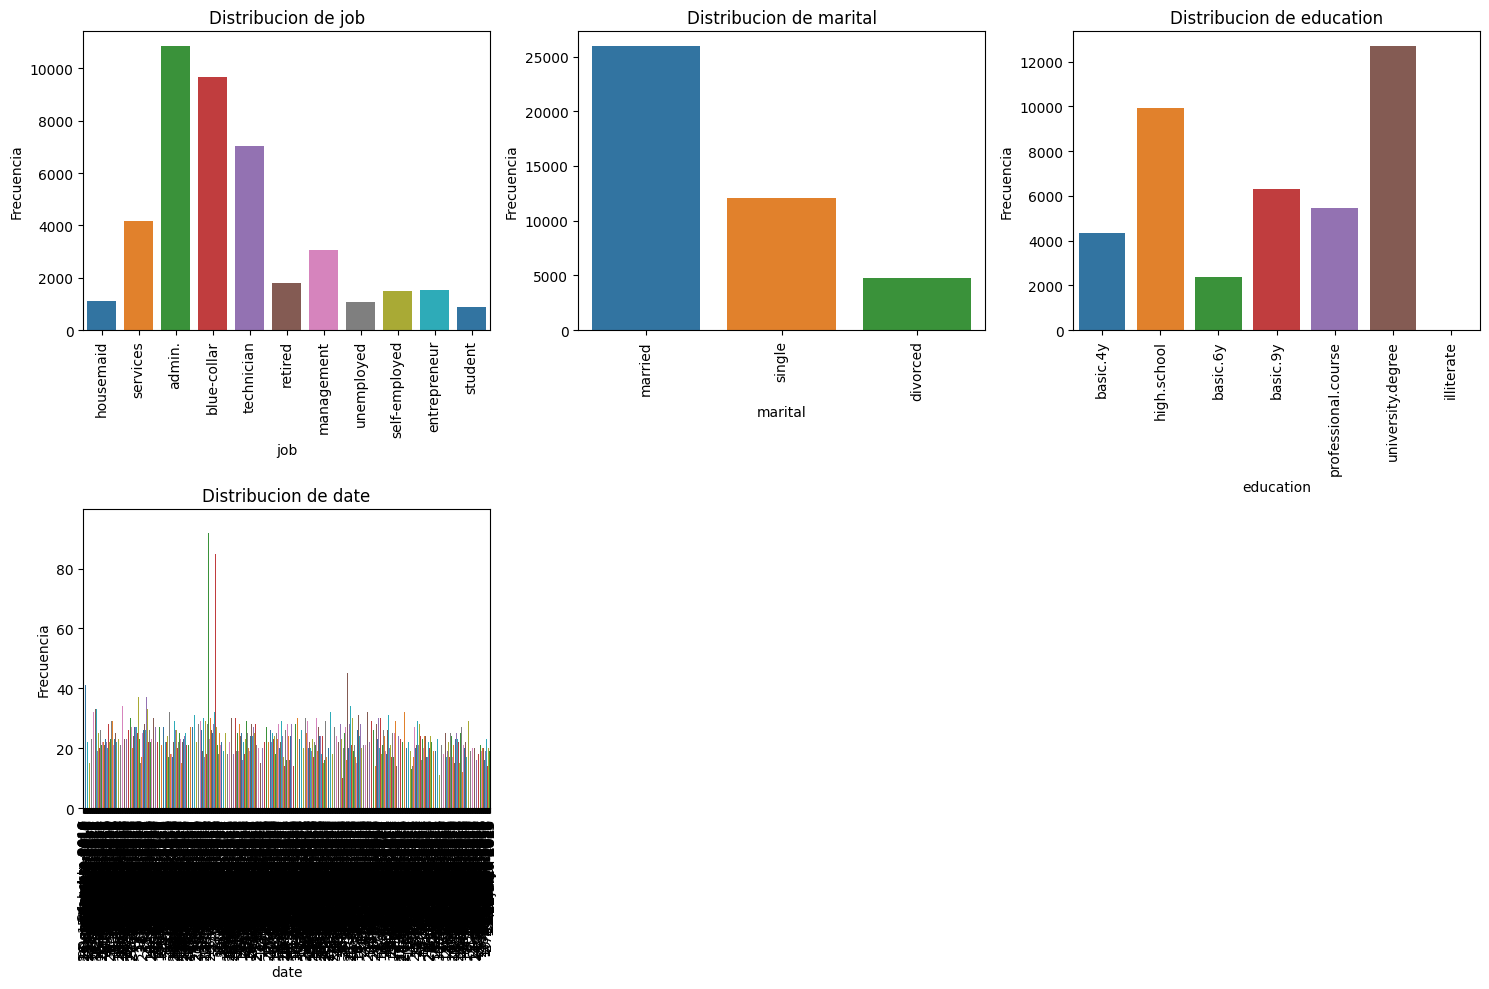

None


In [63]:
result = subplot_col_cat (df_nulos)
print(result)
    

In [64]:
for col in df_nulos.select_dtypes(include="O").columns:
    print(col.upper())
    display(df[col].value_counts()/df.shape[0]*100)
    print("_______________")

JOB


job
admin.           25.286047
blue-collar      22.451163
technician       16.339535
services          9.679070
management        7.093023
retired           4.162791
entrepreneur      3.539535
self-employed     3.462791
housemaid         2.611628
unemployed        2.472093
student           2.100000
Name: count, dtype: float64

_______________
MARITAL


marital
married     60.462791
single      28.151163
divorced    11.188372
Name: count, dtype: float64

_______________
EDUCATION


education
university.degree      29.586047
high.school            23.081395
basic.9y               14.672093
professional.course    12.737209
basic.4y               10.130233
basic.6y                5.548837
illiterate              0.041860
Name: count, dtype: float64

_______________
DATE


date
28-febrero-2018      0.220930
28-febrero-2016      0.218605
28-febrero-2015      0.213953
28-febrero-2017      0.206977
28-febrero-2019      0.197674
                       ...   
17-diciembre-2018    0.025581
21-diciembre-2019    0.023256
14-abril-2015        0.023256
4-abril-2017         0.023256
20-noviembre-2015    0.023256
Name: count, Length: 1825, dtype: float64

_______________


In [66]:
def unkown_to_mode (df, cols):
    for col in cols:
        df[col] = df[col].fillna('unknown')

unkown_to_mode (df, ['job', 'marital', 'education'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      43000 non-null  int64         
 1   age             43000 non-null  float64       
 2   job             43000 non-null  object        
 3   marital         43000 non-null  object        
 4   education       43000 non-null  object        
 5   default         43000 non-null  object        
 6   housing         43000 non-null  int64         
 7   loan            43000 non-null  int64         
 8   contact         43000 non-null  object        
 9   duration        43000 non-null  int64         
 10  campaign        43000 non-null  int64         
 11  pdays           43000 non-null  int64         
 12  previous        43000 non-null  int64         
 13  poutcome        43000 non-null  object        
 14  emp.var.rate    43000 non-null  float64       
 15  co

In [73]:
df.sample(3)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,ID,date_new
23896,23993,60.0,admin.,married,university.degree,0.0,0,0,cellular,515,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,3-agosto-2015,39.706,-75.754,616b9354-dde2-4971-b0e7-0ca3c7e299d0,2015-08-03
17736,17833,33.0,admin.,married,university.degree,0.0,0,1,cellular,255,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,30-diciembre-2018,40.959,-68.174,5b3e50a2-1d9a-4ed1-b390-ab3c4f47c83a,2018-12-30
10470,10567,54.0,blue-collar,married,basic.9y,unknown,0,0,telephone,72,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no,16-agosto-2018,46.545,-121.784,f572a93a-2fc4-48d0-a9aa-24e9a186d267,2018-08-16


Reemplazamos el valor 999 de la columna "pdays" por "no contactado" entendiendo que 999 significa que no se ha contactado al cliente

In [80]:
df["pdays"] = df["pdays"].replace(999, "no contactado")

In [82]:
df.sample(4)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,ID,date_new
23385,23482,36.0,self-employed,single,university.degree,0.0,1,1,cellular,118,5,no contactado,0,nonexistent,1.4,93.444,-36.1,4.857,5228.1,no,24-junio-2015,25.055,-78.040,83304330-4cde-4b72-906e-d777fb0fe25e,2015-06-24
39041,39208,27.0,services,single,university.degree,0.0,1,0,cellular,104,1,6,1,success,-1.8,93.369,-34.8,0.652,5008.7,yes,3-octubre-2019,26.822,-94.628,447798f5-eb57-4b8a-bed2-4f60060a13aa,2019-10-03
8831,8928,46.0,housemaid,married,basic.4y,0.0,1,0,telephone,71,1,no contactado,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no,29-mayo-2017,48.845,-110.465,670269c8-e44c-4108-bdf8-8d3eaa1ca07f,2017-05-29
31384,31528,42.0,blue-collar,single,basic.9y,unknown,1,0,cellular,16,5,no contactado,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no,21-diciembre-2018,44.244,-108.456,c2de3079-85af-4038-8d01-5b8327d2acae,2018-12-21


In [81]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,43000.0,20651.099047,0.0,10381.75,20642.5,30930.25,41187.0,11868.770913
age,43000.0,39.741698,17.0,33.0,38.0,46.0,98.0,9.817735
housing,43000.0,0.54707,0.0,0.0,1.0,1.0,1.0,0.497785
loan,43000.0,0.151907,0.0,0.0,0.0,0.0,1.0,0.358935
duration,43000.0,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033
campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
previous,43000.0,0.174023,0.0,0.0,0.0,0.0,7.0,0.497366
emp.var.rate,43000.0,0.077128,-3.4,-1.8,1.1,1.4,1.4,1.573898
cons.price.idx,43000.0,93.576134,92.201,93.075,93.749,93.994,94.767,0.576652
cons.conf.idx,43000.0,-40.509049,-50.8,-42.7,-41.8,-36.4,-26.9,4.637186


Eliminamos columnas que no nos son necesarias

In [83]:
df = df.drop(columns=['Unnamed: 0', 'latitude', 'longitude', 'date'])


In [84]:
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,ID,date_new
1621,32.0,services,married,high.school,0.0,0,0,telephone,213,2,no contactado,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5c71250e-9787-4ffc-b1bd-eae957f00fd9,2017-03-08


In [85]:
df.to_csv("../data/output/bank-additional_limpio.csv", index=False)